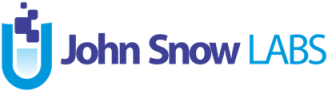

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/Azure_OpenAI_QA_Summarization_Testing_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[evaluate,openai,transformers]" 

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# Azure OpenAI Model Testing For Question Answering

In this section, we dive into testing of Azure OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

### Set environment for Azure OpenAI

In [3]:
import os
import openai

os.environ["OPENAI_API_KEY"] = "<API_KEY>"
openai.api_type = "azure"
openai.api_base = "<ENDPOINT>"
openai.api_version = "2022-12-01"
openai.api_key = os.getenv("OPENAI_API_KEY")

## BoolQ-test-tiny dataset testing

### Setup and Configure Harness

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"azure-openai"}, 
                  data={"data_source" :"BoolQ",
                        "split":"test-tiny"}
                  )

We have specified task as QA, hub as OpenAI and model as gpt-3.5-turbo-instruct, text-davinci-002 whatever model available from azure openai services.

For dataset we used `BoolQ` dataset and `test-tiny` split which includes 50 samples. Other available datasets are: [Benchmark Datasets](https://langtest.org/docs/pages/docs/data#question-answering)

For tests we used lowercase and uppercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for QA task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [23]:
harness.configure({
    'model_parameters': {
        'deployment_name': '<DEPLOYMENT_NAME>',
        'max_tokens': 512
    },
    
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'model_parameters': {'deployment_name': '<DEPLOYMENT_NAME>',
  'max_tokens': 512},
 'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50}, 
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```


### Generating the test cases.

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<?, ?it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...
...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS..."
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [9]:
harness.generated_results()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,is the first series 20 euro note still legal t...,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...,\n\nFalse,\n\nFalse,True
1,robustness,lowercase,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...,\n\nAnswer: True,\n\nAnswer: True,True
2,robustness,lowercase,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,\n\nFalse,\n\nFalse,True
3,robustness,lowercase,are all nba playoff games best of 7,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,nba playoffs -- all rounds are best-of-seven s...,\n\nFalse,\n\nFalse,True
4,robustness,lowercase,can i use my train ticket on the tram in manch...,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,manchester station group -- the manchester sta...,\n\nFalse,\n\nFalse,True
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,is puerto a part of the united states,Puerto Rico -- Puerto Rico (Spanish for ``Rich...,IS PUERTO A PART OF THE UNITED STATES,PUERTO RICO -- PUERTO RICO (SPANISH FOR ``RICH...,\n\nFalse,\n\nAnswer: True,False
96,robustness,uppercase,is devil's knot based on west memphis 3,West Memphis Three -- There have been a number...,IS DEVIL'S KNOT BASED ON WEST MEMPHIS 3,WEST MEMPHIS THREE -- THERE HAVE BEEN A NUMBER...,\n\nFalse,\n\nFalse,True
97,robustness,uppercase,are any of the original temptations still in t...,"The Temptations -- As of 2017, the Temptations...",ARE ANY OF THE ORIGINAL TEMPTATIONS STILL IN T...,"THE TEMPTATIONS -- AS OF 2017, THE TEMPTATIONS...",\n\nFalse,\n\nFalse,True
98,robustness,uppercase,is the isle of wight part of hampshire,Isle of Wight -- The Isle of Wight (/waɪt/; al...,IS THE ISLE OF WIGHT PART OF HAMPSHIRE,ISLE OF WIGHT -- THE ISLE OF WIGHT (/WAꞮT/; AL...,\n\nFalse,\n\nFalse,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,5,45,90%,70%,True
1,robustness,uppercase,6,44,88%,70%,True


## NQ-open-test dataset testing

We can also use another dataset, NQ-open for testing the model.

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"azure-openai"}, 
                  data={"data_source" :"NQ-open",
                        "split":"test-tiny"}
                  )

In [24]:
harness.configure({
    'model_parameters': {
        'deployment_name': '<YOUR_DEPLOYMENT_NAME>',
        'max_tokens': 512
    },
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

{'model_parameters': {'deployment_name': '<YOUR_DEPLOYMENT_NAME>',
  'max_tokens': 512},
 'tests': {'defaults': {'min_pass_rate': 1.0},
  'robustness': {'lowercase': {'min_pass_rate': 0.7},
   'uppercase': {'min_pass_rate': 0.7}}}}

In [16]:
harness.generate()

Generating testcases...: 100%|██████████| 2/2 [00:00<?, ?it/s]


In [17]:
harness.testcases()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-
...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-


In [18]:
harness.run()

Running testcases... : 100%|██████████| 100/100 [04:33<00:00,  2.73s/it]


In [20]:
harness.generated_results()

,category,test_type,original_question,original_context,perturbed_question,perturbed_context,expected_result,actual_result,pass
0,robustness,lowercase,on the 6th day of christmas my true love sent ...,-,on the 6th day of christmas my true love sent ...,-,\nSix geese a-laying.,\nSix geese a-laying.,True
1,robustness,lowercase,how many 5 star generals are there in the us,-,how many 5 star generals are there in the us,-,\n\nThere are currently nine 5-star generals i...,\n\nThere are currently nine 5-star generals i...,True
2,robustness,lowercase,who killed natalie and ann in sharp objects,-,who killed natalie and ann in sharp objects,-,\n\nAdora Crellin killed Natalie and Ann in Sh...,\n\nAdora Crellin killed Natalie and Ann in Sh...,True
3,robustness,lowercase,how many costco locations are there in the us,-,how many costco locations are there in the us,-,\n\nThere are currently 785 Costco locations i...,\n\nThere are currently 785 Costco locations i...,True
4,robustness,lowercase,who played grand moff tarkin in rogue one,-,who played grand moff tarkin in rogue one,-,\n\nPeter Cushing played Grand Moff Tarkin in ...,\n\nPeter Cushing played Grand Moff Tarkin in ...,True
...,...,...,...,...,...,...,...,...,...
95,robustness,uppercase,who has the most followers on the twitter,-,WHO HAS THE MOST FOLLOWERS ON THE TWITTER,-,\n\nThe most followed person on Twitter is sin...,\n\nThe most followed person on Twitter is cur...,True
96,robustness,uppercase,who said it's not what your country can do for...,-,WHO SAID IT'S NOT WHAT YOUR COUNTRY CAN DO FOR...,-,"\n\nJohn F. Kennedy said, ""Ask not what your c...",\n\nJohn F. Kennedy,True
97,robustness,uppercase,when does lil wayne new album drop 2018,-,WHEN DOES LIL WAYNE NEW ALBUM DROP 2018,-,"\n\nLil Wayne's new album, ""Tha Carter V,"" is ...","\n\nLil Wayne's new album, ""Tha Carter V,"" is ...",True
98,robustness,uppercase,the khajuraho temples are especially well know...,-,THE KHAJURAHO TEMPLES ARE ESPECIALLY WELL KNOW...,-,\n\nThe Khajuraho Temples are especially well ...,\n\nThe Khajuraho Temples are especially well ...,True


In [22]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,1,49,98%,70%,True
1,robustness,uppercase,3,47,94%,70%,True


# Azure OpenAI Model Testing For Summarization

In this section, we dive into testing of Azure OpenAI models in Summarization task.

LangTest supports robustness tests for LLM testing for now.

## XSum-test-tiny dataset testing

### Setup and configure harness

In [ ]:
harness = Harness(
                  task="summarization", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"azure-openai"}, 
                  data={"data_source" :"XSum",
                        "split":"test-tiny"}
                  )

We have specified task as Summarization, hub as Azure-OpenAI and model as gpt-3.5-turbo-instruct, text-davinci-002 whatever model available from azure openai services.


For dataset we used `XSum` dataset and `test-tiny` split which includes 50 samples. Other available datasets are: [Benchmark Datasets](https://langtest.org/docs/pages/docs/data#summarization)

For tests we used lowercase and uppercase. Other available robustness tests for summarization task are:

* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slang_typo`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for summarization task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for summarization task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for summarization task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for summarization task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [12]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66}, 
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

`Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.`

### Generating the Test Cases

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [15]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,uppercase,The ex-Reading defender denied fraudulent trad...,THE EX-READING DEFENDER DENIED FRAUDULENT TRAD...
1,robustness,uppercase,Voges was forced to retire hurt on 86 after su...,VOGES WAS FORCED TO RETIRE HURT ON 86 AFTER SU...
2,robustness,uppercase,Seven photographs taken in the Norfolk country...,SEVEN PHOTOGRAPHS TAKEN IN THE NORFOLK COUNTRY...
3,robustness,uppercase,"Chris Poole - known as ""moot"" online - created...","CHRIS POOLE - KNOWN AS ""MOOT"" ONLINE - CREATED..."
4,robustness,uppercase,Four police officers were injured in the incid...,FOUR POLICE OFFICERS WERE INJURED IN THE INCID...
5,robustness,uppercase,The injured pedestrian - a young man - is thou...,THE INJURED PEDESTRIAN - A YOUNG MAN - IS THOU...
6,robustness,uppercase,Barca will be investigated for alleged misappr...,BARCA WILL BE INVESTIGATED FOR ALLEGED MISAPPR...
7,robustness,uppercase,"The think tank said the city's 1,536 schools n...","THE THINK TANK SAID THE CITY'S 1,536 SCHOOLS N..."
8,robustness,uppercase,His 110 means he has scored 323 runs in a week...,HIS 110 MEANS HE HAS SCORED 323 RUNS IN A WEEK...
9,robustness,uppercase,Ms Kendall told the BBC Labour risked sending ...,MS KENDALL TOLD THE BBC LABOUR RISKED SENDING ...


### Running the tests

In [16]:
harness.run()

Running testcases... : 100%|██████████| 30/30 [01:52<00:00,  3.76s/it]


### Generated Results

In [17]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,uppercase,The ex-Reading defender denied fraudulent trad...,THE EX-READING DEFENDER DENIED FRAUDULENT TRAD...,"Sam Sodje, 37, and his brothers Efe, 44, Brig...","Sam Sodje, 37, and his brothers Efe, 44, Brig...",0.920000,True
1,robustness,uppercase,Voges was forced to retire hurt on 86 after su...,VOGES WAS FORCED TO RETIRE HURT ON 86 AFTER SU...,"Adam Voges, a 37-year-old Australian crickete...","Adam Voges, a 37-year-old Australian crickete...",0.776699,True
2,robustness,uppercase,Seven photographs taken in the Norfolk country...,SEVEN PHOTOGRAPHS TAKEN IN THE NORFOLK COUNTRY...,The June edition of British Vogue will featur...,Seven photographs taken by photographer Josh ...,0.616822,True
3,robustness,uppercase,"Chris Poole - known as ""moot"" online - created...","CHRIS POOLE - KNOWN AS ""MOOT"" ONLINE - CREATED...",,"Chris Poole, known as ""moot"" online, created ...",0.000000,False
4,robustness,uppercase,Four police officers were injured in the incid...,FOUR POLICE OFFICERS WERE INJURED IN THE INCID...,Four police officers were injured in an incid...,Four police officers were injured in an incid...,0.962963,True
5,robustness,uppercase,The injured pedestrian - a young man - is thou...,THE INJURED PEDESTRIAN - A YOUNG MAN - IS THOU...,A young man was walking with a group of peopl...,A young man was injured while walking with a ...,0.705882,True
6,robustness,uppercase,Barca will be investigated for alleged misappr...,BARCA WILL BE INVESTIGATED FOR ALLEGED MISAPPR...,\nSandro Rosell resigned as president of FC Ba...,\nSandro Rosell resigned as president of Barce...,0.571429,True
7,robustness,uppercase,"The think tank said the city's 1,536 schools n...","THE THINK TANK SAID THE CITY'S 1,536 SCHOOLS N...","London Councils has warned that 1,536 schools...","London Councils, representing the city's 32 b...",0.383838,False
8,robustness,uppercase,His 110 means he has scored 323 runs in a week...,HIS 110 MEANS HE HAS SCORED 323 RUNS IN A WEEK...,"Jason Roy scored 110 runs in a week, includin...",Tim Murtagh reduced Surrey to 23-2 in the fir...,0.474227,False
9,robustness,uppercase,Ms Kendall told the BBC Labour risked sending ...,MS KENDALL TOLD THE BBC LABOUR RISKED SENDING ...,The Labour Party is in the midst of a leaders...,The Labour Party is in the midst of a leaders...,0.730769,True


### Generate Report

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,5,10,67%,66%,True
1,robustness,lowercase,5,10,67%,60%,True
